In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

# the tweets are totally merged with each other, so we need to tokenize them and do the sentiment analysis on it.

In [2]:
# importing natural language toolkit
import nltk

from nltk.corpus import stopwords
# stopwords: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore.
from nltk.tokenize import word_tokenize
# tokenize: after removing the stopwords we divide the sentence in different tokens or substrings that allows us to analyse the sentiment.
nltk.download('stopwords')
nltk.download('punkt')
# punkt: build a model for abbreviation words, collocations, and words that start sentences

[nltk_data] Downloading package stopwords to C:\Users\SAI
[nltk_data]     SATHVIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SAI
[nltk_data]     SATHVIK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# importing sentiment analysis libraries

In [3]:
import re
import textblob as tb
from textblob import Word
from nltk.probability import FreqDist

# importing the datasets

In [4]:
tr = pd.read_csv('hashtag_donaldtrump.csv')
bd = pd.read_csv('hashtag_joebiden.csv')

C:\Users\SAI SATHVIK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,3,6,11,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
tr.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,15-10-2020 00:00,1316529221557250000,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,21-10-2020 00:00
1,15-10-2020 00:00,1316529222748430000,"Usa 2020, Trump contro Facebook e Twitter: cop...",26,9.0,Social Mediaset,331617619,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.4
2,15-10-2020 00:00,1316529228091840000,"#Trump: As a student I used to hear for years,...",2,1.0,Twitter Web App,8436472,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,00:00.7
3,15-10-2020 00:00,1316529227471230000,2 hours since last tweet from #Trump! Maybe he...,0,0.0,Trumpytweeter,8.28E+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.1
4,15-10-2020 00:00,1316529252301450000,You get a tie! And you get a tie! #Trump ‘s ra...,4,3.0,Twitter for iPhone,47413798,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,00:01.5


In [6]:
bd.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,15-10-2020 00:00,1316529221557250000,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,21-10-2020 00:00
1,15-10-2020 00:00,1316529295859290000,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0,0.0,Twitter for iPad,809904438,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.5
2,15-10-2020 00:00,1316529305006950000,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0,0.0,Twitter Web App,3494182277,Flag Waver,Flag_Wavers,NaN,...,1536,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,00:01.0
3,15-10-2020 00:00,1316529308081550000,@chrislongview Watching and setting dvr. Let’s...,0,0.0,Twitter for iPhone,8.24E+17,Michelle Ferg,MichelleFerg4,NaN,...,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.6
4,15-10-2020 00:00,1316529312741250000,#censorship #HunterBiden #Biden #BidenEmails #...,1,0.0,Twitter Web App,1.03E+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,00:02.1


In [7]:
tr.describe()

,retweet_count
count,9.709330e+05
mean,6.941777e+12
std,2.841043e+15
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.320000e+18


In [8]:
bd.describe()

,retweet_count
count,7.768950e+05
mean,1.647584e+12
std,1.452208e+15
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.280000e+18


In [9]:
tr.shape

(971157, 21)

In [10]:
bd.shape

(777078, 21)

# so from above readings we can say that trump dataset has 9,71,157 data and 21 columns and biden dataset has 7,77,078 data and 21 columns

# we will check for null values and datatypes

In [11]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971157 entries, 0 to 971156
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            971088 non-null  object 
 1   tweet_id              971073 non-null  object 
 2   tweet                 971073 non-null  object 
 3   likes                 971045 non-null  object 
 4   retweet_count         970933 non-null  float64
 5   source                970057 non-null  object 
 6   user_id               970929 non-null  object 
 7   user_name             970917 non-null  object 
 8   user_screen_name      970933 non-null  object 
 9   user_description      869663 non-null  object 
 10  user_join_date        970779 non-null  object 
 11  user_followers_count  970917 non-null  object 
 12  user_location         675839 non-null  object 
 13  lat                   445702 non-null  object 
 14  long                  445705 non-null  object 
 15  

In [12]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777078 entries, 0 to 777077
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            777073 non-null  object 
 1   tweet_id              776995 non-null  object 
 2   tweet                 776995 non-null  object 
 3   likes                 776914 non-null  object 
 4   retweet_count         776895 non-null  float64
 5   source                776182 non-null  object 
 6   user_id               776889 non-null  object 
 7   user_name             776877 non-null  object 
 8   user_screen_name      776895 non-null  object 
 9   user_description      694885 non-null  object 
 10  user_join_date        776784 non-null  object 
 11  user_followers_count  776885 non-null  object 
 12  user_location         543066 non-null  object 
 13  lat                   355284 non-null  object 
 14  long                  355284 non-null  object 
 15  

# we need to drop the unwanted columns that add noise and incosistency in our model to perform sentiment analysis. 

# DATA CLEANING

In [13]:
tr.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')

# from above we can drop tweet_id, collected_at, user_description that doesnt work in our model.

In [14]:
tr = tr.drop(columns=['tweet_id','collected_at','user_description'])

In [15]:
tr

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code
0,15-10-2020 00:00,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,23-08-2011 15:33,1860,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL
1,15-10-2020 00:00,"Usa 2020, Trump contro Facebook e Twitter: cop...",26,9.0,Social Mediaset,331617619,Tgcom24,MediasetTgcom24,08-07-2011 13:12,1067661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15-10-2020 00:00,"#Trump: As a student I used to hear for years,...",2,1.0,Twitter Web App,8436472,snarke,snarke,26-08-2007 05:56,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR
3,15-10-2020 00:00,2 hours since last tweet from #Trump! Maybe he...,0,0.0,Trumpytweeter,8.28E+17,Trumpytweeter,trumpytweeter,05-02-2017 21:32,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15-10-2020 00:00,You get a tie! And you get a tie! #Trump ‘s ra...,4,3.0,Twitter for iPhone,47413798,Rana Abtar - رنا أبتر,Ranaabtar,15-06-2009 19:05,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971152,08-11-2020 23:59,@PelleX @Mikerger @spiegelbilderz_ @BertiFranz...,0.0,0.0,Twitter Web App,3427951089.0,Alexander P. Vogt,APVogt,17-08-2015 12:37,2106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
971153,08-11-2020 23:59,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...,4.0,0.0,Twitter Web App,3245258109.0,ahzy,ahhhzy,10-05-2015 19:56,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
971154,08-11-2020 23:59,#AfD|ler reagieren panisch bis hysterisch auf ...,25.0,4.0,Twitter Web App,987000000000000000.0,watchdog,wilke_tobias,18-04-2018 14:21,3014,Saxony/GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN
971155,08-11-2020 23:59,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,768781141.0,Debra,drdeblk,20-08-2012 03:53,1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
tr.shape

(971157, 18)

# from 21 columns we dropped 3 so it has 18 columns now. 

In [17]:
bd = bd.drop(columns=['tweet_id','collected_at','user_description'])

In [18]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777078 entries, 0 to 777077
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            777073 non-null  object 
 1   tweet                 776995 non-null  object 
 2   likes                 776914 non-null  object 
 3   retweet_count         776895 non-null  float64
 4   source                776182 non-null  object 
 5   user_id               776889 non-null  object 
 6   user_name             776877 non-null  object 
 7   user_screen_name      776895 non-null  object 
 8   user_join_date        776784 non-null  object 
 9   user_followers_count  776885 non-null  object 
 10  user_location         543066 non-null  object 
 11  lat                   355284 non-null  object 
 12  long                  355284 non-null  object 
 13  city                  186869 non-null  object 
 14  country               353770 non-null  object 
 15  

In [19]:
bd.shape

(777078, 18)

# from 21 columns we dropped 3 so it has 18 columns now.

# as the election has started at a particular time, we need to sort the values from starting date to ending date.

In [20]:
tr.sort_values(by='created_at')
tr.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code
0,15-10-2020 00:00,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,23-08-2011 15:33,1860,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL
1,15-10-2020 00:00,"Usa 2020, Trump contro Facebook e Twitter: cop...",26,9.0,Social Mediaset,331617619,Tgcom24,MediasetTgcom24,08-07-2011 13:12,1067661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15-10-2020 00:00,"#Trump: As a student I used to hear for years,...",2,1.0,Twitter Web App,8436472,snarke,snarke,26-08-2007 05:56,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR
3,15-10-2020 00:00,2 hours since last tweet from #Trump! Maybe he...,0,0.0,Trumpytweeter,8.28E+17,Trumpytweeter,trumpytweeter,05-02-2017 21:32,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15-10-2020 00:00,You get a tie! And you get a tie! #Trump ‘s ra...,4,3.0,Twitter for iPhone,47413798,Rana Abtar - رنا أبتر,Ranaabtar,15-06-2009 19:05,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC


In [21]:
bd.sort_values(by='created_at')
bd.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code
0,15-10-2020 00:00,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,23-08-2011 15:33,1860,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL
1,15-10-2020 00:00,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0,0.0,Twitter for iPad,809904438,Cheri A. 🇺🇸,Biloximeemaw,08-09-2012 01:03,6628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15-10-2020 00:00,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0,0.0,Twitter Web App,3494182277,Flag Waver,Flag_Wavers,30-08-2015 19:38,1536,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT
3,15-10-2020 00:00,@chrislongview Watching and setting dvr. Let’s...,0,0.0,Twitter for iPhone,8.24E+17,Michelle Ferg,MichelleFerg4,25-01-2017 14:16,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15-10-2020 00:00,#censorship #HunterBiden #Biden #BidenEmails #...,1,0.0,Twitter Web App,1.03E+18,the Gold State,theegoldstate,24-08-2018 01:49,390,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA


# we have sorted all the values, now we need to drop the null values.

In [22]:
tr = tr.dropna()
bd = bd.dropna()

In [23]:
tr

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code
2,15-10-2020 00:00,"#Trump: As a student I used to hear for years,...",2,1.0,Twitter Web App,8436472,snarke,snarke,26-08-2007 05:56,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR
4,15-10-2020 00:00,You get a tie! And you get a tie! #Trump ‘s ra...,4,3.0,Twitter for iPhone,47413798,Rana Abtar - رنا أبتر,Ranaabtar,15-06-2009 19:05,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC
11,15-10-2020 00:00,"In 2020, #NYPost is being #censorship #CENSORE...",0,0.0,Twitter for iPhone,19940334,Change Illinois | Biden will increase taxes by...,changeillinois,02-02-2009 23:08,1396,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL
12,15-10-2020 00:00,#Trump #PresidentTrump #Trump2020LandslideVict...,3,5.0,Twitter for Android,1.24E+18,Ron Burgundy,Anchorman_USA,26-03-2020 23:14,496,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA
13,15-10-2020 00:00,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2,0.0,Twitter Web App,343956175,Sebastian White,SebWrites,28-07-2011 10:07,2755,Edinburgh ~ Heart of Scotland!,55.953346,-3.188375,City of Edinburgh,United Kingdom,Europe,Scotland,SCT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971128,08-11-2020 23:58,Cómo pasó el abogado de Trump de un hotel a un...,0.0,1.0,Twitter Web App,84963978.0,Impacto Latino,ImpactoLatino,24-10-2009 23:36,1517,New York City,40.712728,-74.006015,New York,United States of America,North America,New York,NY
971133,08-11-2020 23:58,Have you know decency #Trump @GOP? Do you kno...,3.0,0.0,Twitter Web App,48352311.0,"Linda ""I Voted for Biden"" Kenney Baden",KenneyBaden,18-06-2009 13:41,3024,"New York, USA",40.712728,-74.006015,New York,United States of America,North America,New York,NY
971134,08-11-2020 23:58,@TeamTrump @alex281832 #Trump is being made to...,1.0,0.0,Twitter for Android,500886203.0,Ken Noble😎,knoble62,23-02-2012 15:31,453,"West London, UK",51.532568,-0.4807,London,United Kingdom,Europe,England,ENG
971145,08-11-2020 23:59,"Donald Trump, Moscow, 1996, shared by @oooroma...",8.0,3.0,Twitter Web App,388137441.0,Elisabeth Schimpfössl,ElisabethSchimp,10-10-2011 07:52,586,"London, England",51.507322,-0.127647,London,United Kingdom,Europe,England,ENG


In [24]:
tr.shape

(199156, 18)

In [25]:
bd.shape

(164670, 18)

# Hence the data has been reduced drastically, From 1 Million to 2 Lakh in Trump and 7 Lakhs to 1.6 Lakh in Biden

# Understanding the distrubution in the data through the visualisation

# Converting new data into csv files for better visualisation

In [42]:
tr.to_csv('Trump_New_Data.csv')

In [43]:
bd.to_csv('Biden_New_Data.csv')

# ----------------------------------------------------------------------------------------------------

# First step towards sentiment Analysis is to always understand how many tweets biden or trump has got.

In [26]:
tr.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'source', 'user_id',
       'user_name', 'user_screen_name', 'user_join_date',
       'user_followers_count', 'user_location', 'lat', 'long', 'city',
       'country', 'continent', 'state', 'state_code'],
      dtype='object')

# Only filter out united states of america data.

In [27]:
replace1 = {"United States of America":"United States"}
tr['country'].replace(replace1,inplace=True)
bd['country'].replace(replace1,inplace=True)

tr = tr.loc[tr['country'] == 'United States']
bd = bd.loc[bd['country'] == 'United States']

C:\Users\SAI SATHVIK\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [28]:
tr1 = tr.groupby(['state']).count().tweet

# using the state we can understand that from what state how many tweets biden has got and how many tweets trump has got.

# as the data is in the raw format we need to arrange them in the dataframe format.

In [29]:
tr2 = pd.DataFrame(tr1)

In [30]:
bd1 = bd.groupby(['state']).count().tweet

In [31]:
bd2 = pd.DataFrame(bd1)

In [32]:
new_data = pd.merge(tr2, bd2, on= 'state')

# we have attained it in the dataframe format, now merge the biden(new dataset), and trump (new_dataset) into the other dataset.

# we need to rename the columns 

In [33]:
new_data = new_data.rename(columns={'tweet_x':'Trump Tweets(count)','tweet_y':'Biden Tweets(count)'})

In [34]:
new_data

,Trump Tweets(count),Biden Tweets(count)
state,,
Alabama,316,293
Alaska,93,126
Arizona,1675,1847
Arkansas,70,75
California,19660,16824
Colorado,1666,1276
Connecticut,195,151
Delaware,15,87
District of Columbia,9481,6993


# We got the above successfully.

# DATA VISUALISATION

Text(0, 0.5, 'No. Of Tweets')

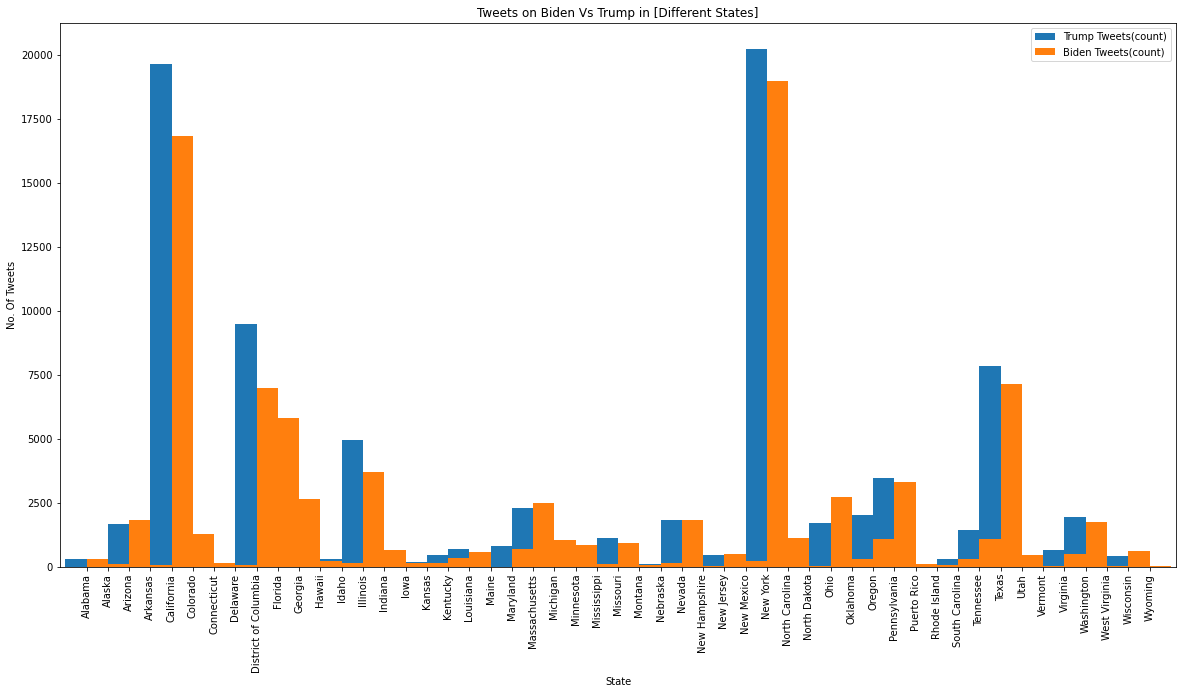

In [35]:
new_data.plot(kind = 'bar',title = 'Tweets on Biden Vs Trump in [Different States]',figsize=(20,10),width=2)
plt.xlabel('State')
plt.ylabel('No. Of Tweets')

# Cleaning the tweets (Stop words, Tokenisation, Lemmatisation, Chunking)

# we need to call the method on both the trump and biden dataset, so make it reusable

In [37]:
def clean_tweets(tweet):
    tweet = tweet.lower()
    tweet_remove = r'\d+|http?\S+|[^A-Za-z0-9]+' # using regex remove http, and numbers and characters with special
    tweet = re.sub(tweet_remove,' ',tweet) #sub the regex removal functions with  ' ' in the tweet
    
    
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(tweet)
    
    filter_tweets = []
    for i in tokens:
        if i not in stop_words:
            filter_tweets.append(i)   # if the words is not a stop words or noised word then only append it in the list with a space.
    
    return filter_tweets

# We are storing all the words in trump tweets removing the stop words and noise in the data and cleaning them to store it in another list

# Simolar, We are storing all the words in Biden tweets removing the stop words and noise in the data and cleaning them to store it in another list

In [38]:
trump_All_Tweets = tr['tweet'].apply(lambda x : clean_tweets(x))
biden_All_Tweets = bd['tweet'].apply(lambda x : clean_tweets(x))

In [40]:
trump_All_Tweets.head()

2     [trump, student, used, hear, years, ten, years...
4              [get, tie, get, tie, trump, rally, iowa]
11    [nypost, censorship, censored, twitter, manipu...
12    [trump, presidenttrump, trump, landslidevictor...
22    [trump, nobody, likes, tell, farmers, better, ...
Name: tweet, dtype: object

In [41]:
biden_All_Tweets.head()

6     [nypost, censorship, censored, twitter, manipu...
17    [comments, democrats, understand, ruthless, ch...
22    [twitter, everything, help, democrats, win, el...
25    [realjameswoods, bidencrimefamily, joebiden, h...
29    [come, abc, please, right, thing, move, biden,...
Name: tweet, dtype: object

# From the above we can see we got the list of all the words regarding biden tweets and trump tweets in the next stage we can perform sentiment Analysis on it and understand what user thouhgts are about who is gonna win the elections.